## 可视化第一课（matplotlib）练习

####  作业提交说明：
- 位置：作业文件统一放置于/0.Teacher/Exercise/Visualization1/下
- 文件名：请先复制该notebook文件，并重新命名为(课程名)+(您姓名的全拼)，并按要求完成后保存
- 时间：课程结束后的第二天前提交。
- 注意：请勿抄袭，移动，修改，删除其他同学和原始空白的练习文件。

In [61]:
%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

## 练习1：航班乘客变化分析
* 从seaborn库中载入flights数据并查看表头

In [2]:
data = sns.load_dataset("flights")
data.head()
# 年份，月份，乘客数

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


* 分析年度乘客总量变化情况（折线图）

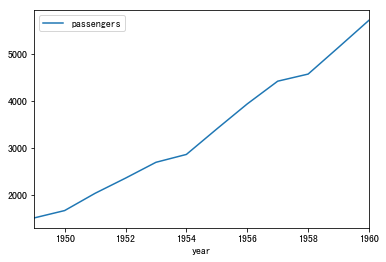

In [8]:
data.groupby("year")[["passengers"]].sum().plot()


* 分析乘客在一年中各月份的分布（柱状图）

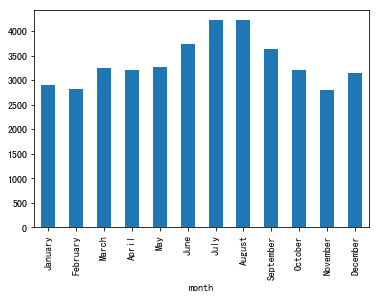

In [4]:
data.groupby('month')['passengers'].sum().plot(kind='bar')

## 练习2：鸢尾花花型尺寸分析

* 从seaborn库中载入flights数据并查看表头

In [3]:
data = sns.load_dataset("iris")
data.head()
# 萼片长度，萼片宽度，花瓣长度，花瓣宽度，种类

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


* 萼片（sepal）和花瓣（petal）的大小关系（散点图）

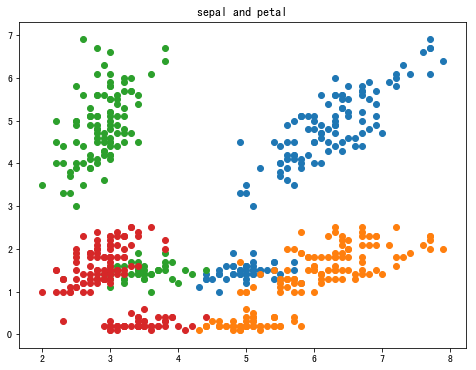

In [4]:
mpl.rc('figure', figsize=(8,6))
fig, axes = plt.subplots()

def speal_petal(data, axes, title):
    axes.scatter(data['sepal_length'], data['petal_length'])
    axes.scatter(data['sepal_length'], data['petal_width'])
    axes.scatter(data['sepal_width'], data['petal_length'])
    axes.scatter(data['sepal_width'], data['petal_width'])
    axes.set_title(title)
#     fig.suptitle('sepal and petal')
    
speal_petal(data, axes, 'sepal and petal')

* 不同种类（species）鸢尾花萼片和花瓣的大小关系（分类散点子图）

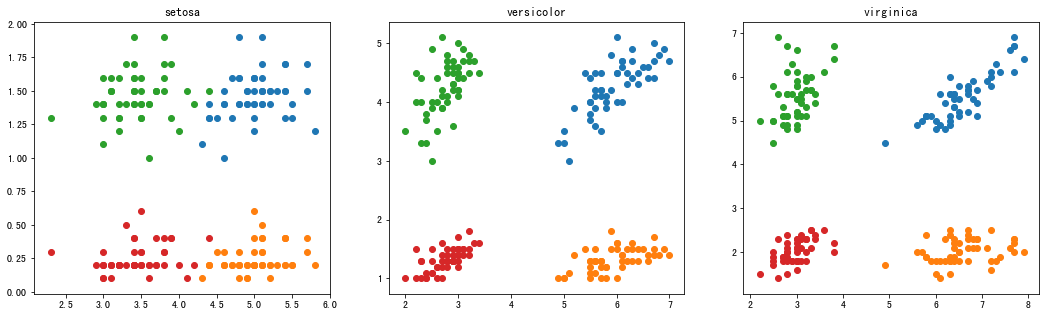

In [31]:
mpl.rc('figure', figsize=(18,5))
ax = []
fig, ax = plt.subplots(1,3)
species = data['species'].unique() 
for i in range(len(species)):
    data_species = data.loc[data['species'] == species[i], :]
    speal_petal(data_species, ax[i], species[i])

# data_species = data.loc[data['species'] == species[i], :]
# speal_petal(data_species,ax[1],species[1])

    

* 不同种类鸢尾花萼片和花瓣大小的分布情况（柱状图或者箱式图）

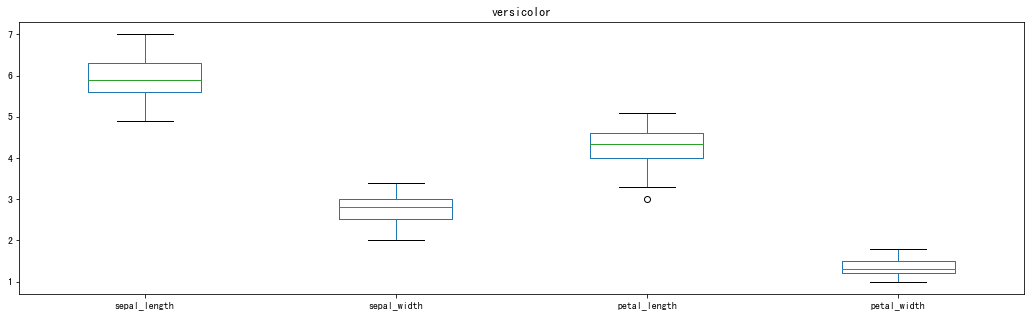

In [32]:
data.loc[data['species'] == 'versicolor', :].plot.box(title='versicolor')

In [ ]:
data.loc[data['species'] == 'setosa', :].plot.box(title='setosa')

In [ ]:
data.loc[data['species'] == 'virginica', :].plot.box(title='virginica')

## 练习3：餐厅小费情况分析


In [88]:
data = sns.load_dataset("tips")
data.head()
# 总消费，小费，性别，吸烟与否，就餐星期，就餐时间，就餐人数

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


* 小费和总消费之间的关系（散点图）

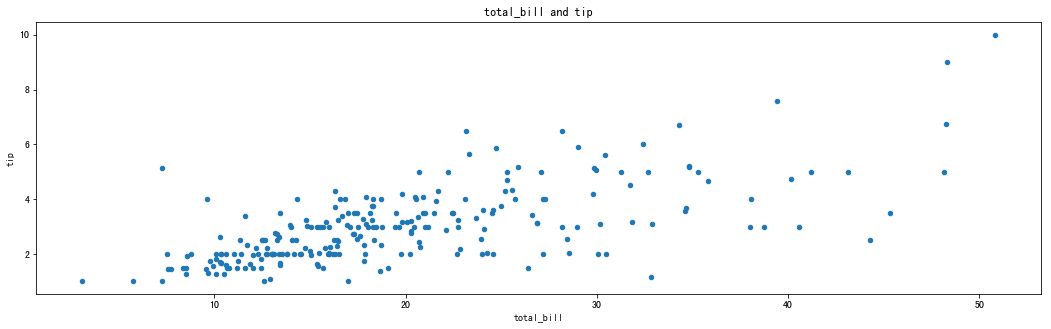

In [89]:
# your code
data.plot.scatter(x='total_bill',y='tip', title='total_bill and tip')

* 男性顾客和女性顾客，谁更慷慨（分类箱式图）

Text(0.5, 1.0, 'Gender vs Tip')

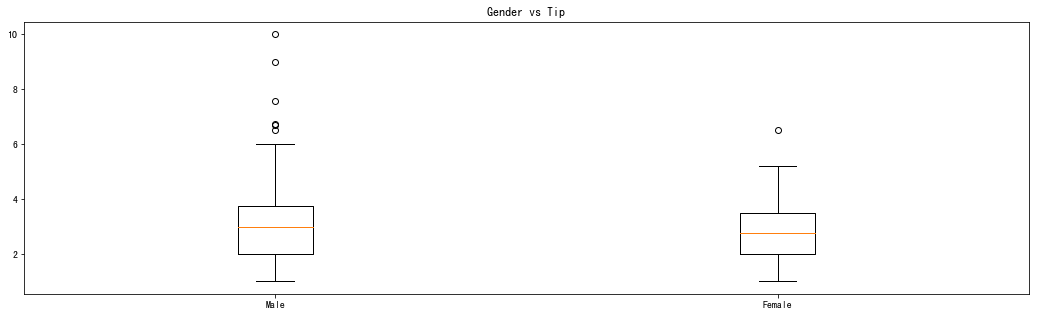

In [90]:
plt.boxplot([data.loc[data.sex == 'Male', 'tip'], data.loc[data.sex == 'Female', 'tip']], labels=['Male', 'Female'])
plt.title('Gender vs Tip')

* 抽烟与否是否会对小费金额产生影响（分类箱式图）

In [ ]:
plt.boxplot([data.loc[data.smoker == 'Yes', 'tip'], data.loc[data.smoker == 'No', 'tip']], labels=['Yes', 'No'])
plt.title('Smoker vs Tip')

* 工作日和周末，什么时候顾客给的小费更慷慨（分类箱式图）

In [ ]:
    plt.boxplot([
        data.loc[(data.day == 'Sun') | (data.day == 'Sat'), 'tip'], 
        data.loc[(data.day != 'Sun') & (data.day != 'Sat'), 'tip']
    ], labels=['Weekend', 'Weekday'])
    plt.title('Day vs Tip')

* 午饭和晚饭，哪一顿顾客更愿意给小费（分类箱式图）

In [ ]:
plt.boxplot([
    data.loc[data.time == 'Lunch', 'tip'], 
    data.loc[data.time == 'Dinner', 'tip']
], labels=['Lunch', 'Dinner'])
plt.title('Time vs Tip')

* 就餐人数是否会对慷慨度产生影响（分类箱式图）

Text(0.5, 1.0, 'p_count vs Tip')

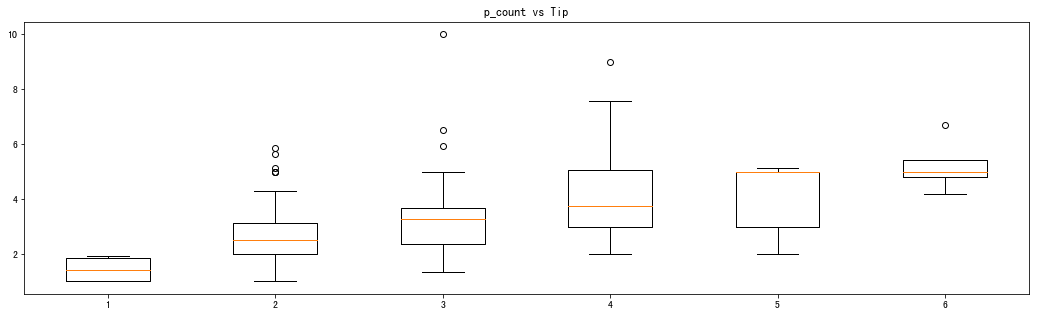

In [91]:
p_count = data['size'].unique()
p_count.sort()
d = []
l = []
for i in p_count:
    d.append(data.loc[data['size'] == i, 'tip'])
    l.append(i)
plt.boxplot(d, labels=l)
plt.title('p_count vs Tip')

* 性别+抽烟的组合因素对慷慨度的影响（分组柱状图）

Text(0.5, 1.0, 'Sex&Smoker vs Tip')

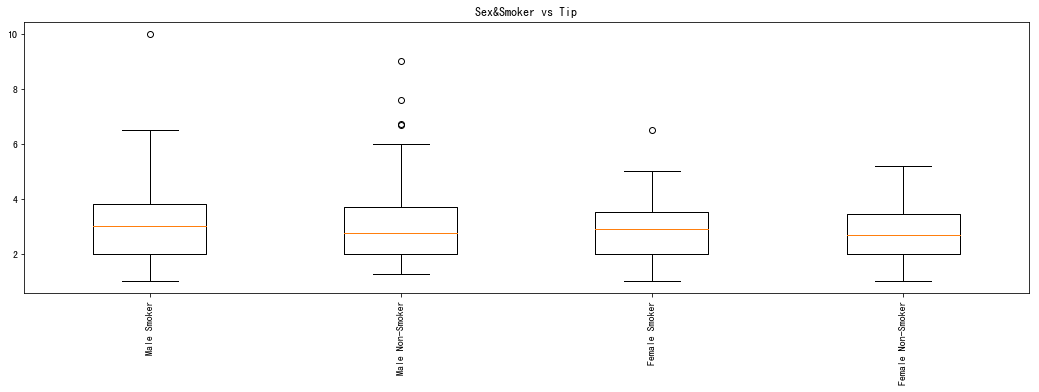

In [92]:
plt.xticks(rotation=90)
d = []
l = []
for gender in ['Male', 'Female']:
    for isSmoker in ['Yes', 'No']:
        d.append(data.loc[(data['sex'] == gender) & (data['smoker'] == isSmoker), 'tip'])
        l.append(gender + ' ' + ('Non-' if isSmoker == 'No' else '') + 'Smoker')
plt.boxplot(d, labels=l)
plt.title('Sex&Smoker vs Tip')

## 练习4：泰坦尼克号海难幸存状况分析
* 载入数据集

In [7]:
data = sns.load_dataset("titanic")
data.head()
# 幸存与否，仓位等级，性别，年龄，堂兄弟姐妹数，父母子女数，票价，上船港口缩写，仓位等级，人员分类，是否成年男性，所在甲板，上船港口，是否幸存，是否单独乘船

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


* 不同仓位等级中幸存和遇难的乘客比例（堆积柱状图）

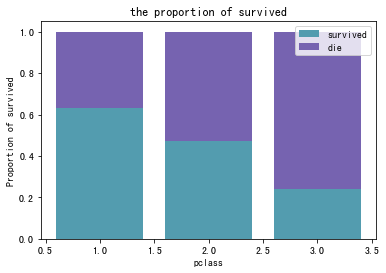

In [62]:
# 不同仓位等级中幸存和遇难的乘客比例（堆积柱状图）
mean_by_reg_co_day = data[['pclass', 'survived']].groupby('pclass')['survived'].value_counts()

x = mean_by_reg_co_day.unstack()

x['total'] = x[0] + x[1]
x['die_prop'] = x[0] / x['total']
x['survived_prop'] = x[1] / x['total']


# 绘制堆积柱状图
def stackedbarplot(x_data, y_data_list, y_data_names, colors, x_label, y_label, title):
    _, ax = plt.subplots()
    # 循环绘制堆积柱状图
    for i in range(0, len(y_data_list)):
        if i == 0:
            ax.bar(x_data, y_data_list[i], color = colors[i], align = 'center', label = y_data_names[i])
        else:
            # 采用堆积的方式，除了第一个分类，后面的分类都从前一个分类的柱状图接着画
            # 用归一化保证最终累积结果为1
            ax.bar(x_data, y_data_list[i], color = colors[i], bottom = y_data_list[i - 1], align = 'center', label = y_data_names[i])
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    ax.legend(loc = 'upper right') # 设定图例位置

# 调用绘图函数
stackedbarplot(x_data = x.index.values
               , y_data_list = [x['survived_prop'],x['die_prop'] ]
               , y_data_names = ['survived','die']
               , colors = ['#539caf', '#7663b0']
               , x_label = 'pclass'
               , y_label = 'Proportion of survived'
               , title = 'the proportion of survived')

* 不同性别的幸存比例（堆积柱状图）

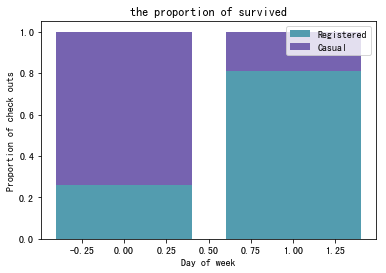

In [78]:
# 不同性别的幸存比例（堆积柱状图）
mean_by_reg_co_day = data[['sex', 'survived']].groupby('sex')['survived'].value_counts()
mean_by_reg_co_day = mean_by_reg_co_day.unstack()
mean_by_reg_co_day['total'] = mean_by_reg_co_day[0] + mean_by_reg_co_day[1]
mean_by_reg_co_day['die_prop'] = mean_by_reg_co_day[0] / mean_by_reg_co_day['total']
mean_by_reg_co_day['survived_prop'] = mean_by_reg_co_day[1] / mean_by_reg_co_day['total']
mean_by_reg_co_day


# 调用绘图函数
stackedbarplot(x_data = [0,1]
               , y_data_list = [mean_by_reg_co_day['die_prop'], mean_by_reg_co_day['survived_prop']]
               , y_data_names = ['Registered', 'Casual']
               , colors = ['#539caf', '#7663b0']
               , x_label = 'Day of week'
               , y_label = 'Proportion of check outs'
               , title = 'the proportion of survived')

* 幸存和遇难乘客的票价分布（分类箱式图）

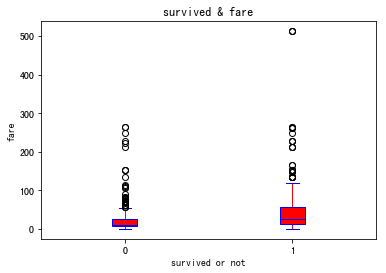

In [80]:
#幸存和遇难乘客的票价分布（分类箱式图）
# 只需要指定分类的依据，就能自动绘制箱式图

days = np.unique(data['survived'])
bp_data = []
for day in days:
    bp_data.append(data[data['survived'] == day]['fare'].values)

# 定义绘图函数
def boxplot(x_data, y_data, base_color, median_color, x_label, y_label, title):
    _, ax = plt.subplots()

    # 设置样式
    ax.boxplot(y_data
               # 箱子是否颜色填充
               , patch_artist = True
               # 中位数线颜色
               , medianprops = {'color': base_color}
               # 箱子颜色设置，color：边框颜色，facecolor：填充颜色
               , boxprops = {'color': base_color, 'facecolor': median_color}
               # 猫须颜色whisker
               , whiskerprops = {'color': median_color}
               # 猫须界限颜色whisker cap
               , capprops = {'color': base_color})

    # 箱图与x_data保持一致
    ax.set_xticklabels(x_data)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)

# 调用绘图函数
boxplot(x_data = days
        , y_data = bp_data
        , base_color = 'b'
        , median_color = 'r'
        , x_label = 'survived or not'
        , y_label = 'fare'
        , title = 'survived & fare')

x = data.dropna(axis=0, how='any')
days = np.unique(x['survived'])
age_data = []
for day in days:
    age_data.append(x[x['survived'] == day]['age'].values)

* 幸存和遇难乘客的年龄分布（分类箱式图）

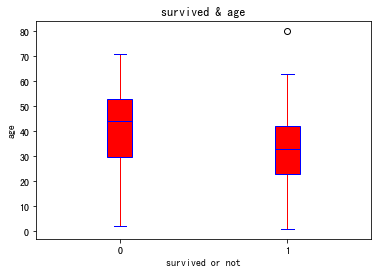

In [81]:
# 幸存和遇难乘客的年龄分布（分类箱式图）
boxplot(x_data = days
        , y_data = age_data
        , base_color = 'b'
        , median_color = 'r'
        , x_label = 'survived or not'
        , y_label = 'age'
        , title = 'survived & age')

* 不同上船港口的乘客仓位等级分布（分组柱状图）

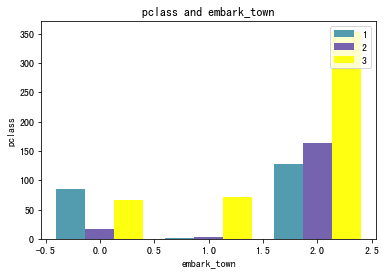

In [82]:
# 绘制分组柱状图的函数
def groupedbarplot(x_data, y_data_list, y_data_names, colors, x_label, y_label, title):
    _, ax = plt.subplots()
    # 设置每一组柱状图的宽度
    total_width = 0.8
    # 设置每一个柱状图的宽度
    ind_width = total_width / len(y_data_list)
    # 计算每一个柱状图的中心偏移
    alteration = np.arange(-total_width/2+ind_width/2, total_width/2+ind_width/2, ind_width)
    # 分别绘制每一个柱状图
    for i in range(0, len(y_data_list)):
        # 横向散开绘制
        ax.bar(x_data + alteration[i], y_data_list[i], color = colors[i], label = y_data_names[i], width = ind_width)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    ax.legend(loc = 'upper right')

    
x = data.groupby("embark_town")["pclass"].value_counts()
mean_by_reg_co_day = x.unstack()
mean_by_reg_co_day


# 调用绘图函数
groupedbarplot(x_data = [0,1,2]
               , y_data_list = [mean_by_reg_co_day[1], mean_by_reg_co_day[2], mean_by_reg_co_day[3]]
               , y_data_names = ['1', '2','3']
               , colors = ['#539caf', '#7663b0','#ffff11']
               , x_label = 'embark_town'
               , y_label = 'pclass'
               , title = 'pclass and embark_town')

* 幸存和遇难乘客堂兄弟姐妹的数量分布（分类箱式图）

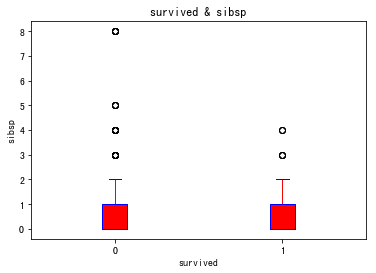

In [83]:
survived = np.unique(data['survived'])
bp_data = []
for day in survived:
    bp_data.append(data[data['survived'] == day]['sibsp'].values)
    
# 调用绘图函数
boxplot(x_data = survived
        , y_data = bp_data
        , base_color = 'b'
        , median_color = 'r'
        , x_label = 'survived'
        , y_label = 'sibsp'
        , title = 'survived & sibsp')    


* 幸存和遇难乘客父母子女的数量分布（分类箱式图）

In [ ]:
survived = np.unique(data['survived'])
bp_data = []
for day in survived:
    bp_data.append(data[data['survived'] == day]['parch'].values)
    
# 调用绘图函数
boxplot(x_data = survived
        , y_data = bp_data
        , base_color = 'b'
        , median_color = 'r'
        , x_label = 'survived'
        , y_label = 'parch'
        , title = 'survived & parent and children count')   

* 单独乘船与否和幸存之间有没有联系（堆积柱状图或者分组柱状图）

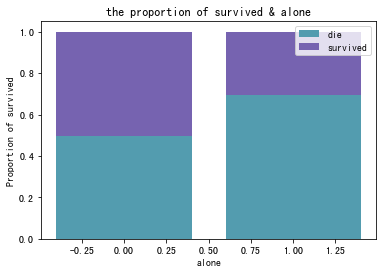

In [84]:
mean_by_reg_co_day = data[['alone', 'survived']].groupby('alone')['survived'].value_counts()
x = mean_by_reg_co_day.unstack()

x['total'] = x[0] + x[1]
x['die_prop'] = x[0] / x['total']
x['survived_prop'] = x[1] / x['total']



# 调用绘图函数
stackedbarplot(x_data = x.index.values
               , y_data_list = [x['die_prop'], x['survived_prop']]
               , y_data_names = ['die', 'survived']
               , colors = ['#539caf', '#7663b0']
               , x_label = 'alone'
               , y_label = 'Proportion of survived'
               , title = 'the proportion of survived & alone')

In [86]:
x.head()
x.index.values

array([False, True], dtype=object)